Importar las Librerías y Cargar el Dataset:

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [11]:
# Cargar el dataset
data = pd.read_csv('winequality-red.csv')

In [13]:
# Mostrar las primeras filas del dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.  Análisis Exploratorio de Datos (EDA)
Analiza la distribución de las variables y la relación entre ellas:

In [15]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [17]:
# Estadísticas descriptivas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


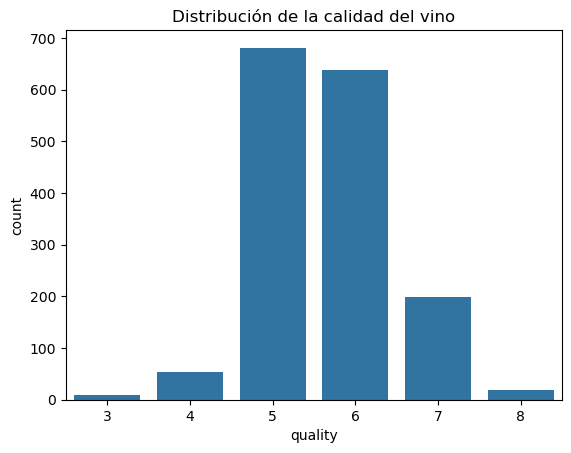

In [19]:
# Distribución de la variable objetivo (calidad)
sns.countplot(x='quality', data=data)
plt.title("Distribución de la calidad del vino")
plt.show()

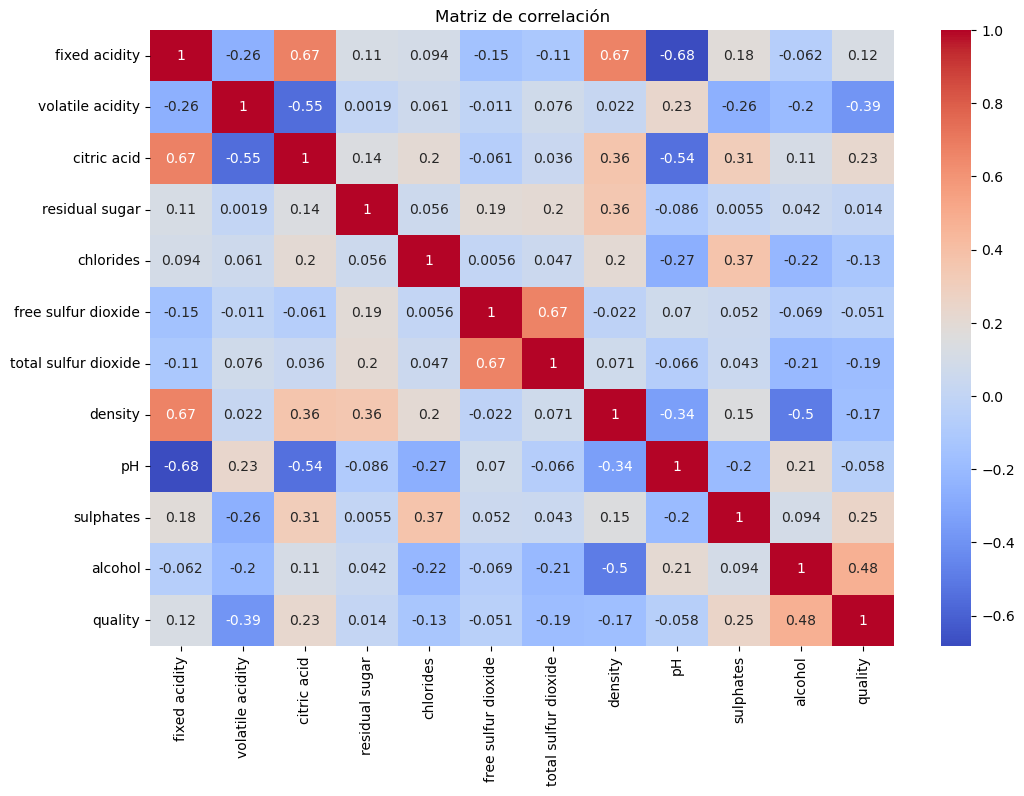

In [21]:
# Correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

2. Preprocesamiento de Datos
Limpia los datos y trata los valores atípicos si es necesario:

In [23]:
# Verificar valores faltantes
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# Opcional: eliminar o imputar valores faltantes si es necesario
# En este caso, el dataset no contiene valores faltantes

In [25]:
# Escalado de características (opcional para Árboles de Decisión, pero útil si se usan otros modelos)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))

In [27]:
# Convertir a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])

3. Selección de Características
Selecciona las características más relevantes para entrenar el modelo:

In [29]:
# Separar características (X) y la variable objetivo (y)
X = scaled_data
y = data['quality']

In [31]:
# Selección de características con ANOVA
selector = SelectKBest(score_func=f_classif, k=8)  # Selecciona las 8 mejores características
X_selected = selector.fit_transform(X, y)

In [33]:
# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


4. División del Dataset en Train y Test
Divide el dataset en entrenamiento y prueba:

In [35]:
# Dividir los datos en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

In [37]:
# Verificar las dimensiones
print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (1119, 8)
Test set: (480, 8)


5. Entrenamiento del Modelo
Entrena el modelo con hiperparámetros configurados:

In [39]:
# Entrenar el modelo con un árbol de decisión
tree = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
# Predicción en el conjunto de test
y_pred = tree.predict(X_test)

6. Evaluación del Modelo
Evalúa el desempeño del modelo utilizando métricas como la precisión, recall, F1-score:

In [43]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

Matriz de Confusión:
 [[  0   0   2   1   0   0]
 [  0   0  15   1   0   0]
 [  0   1 143  58   2   0]
 [  0   1  64 118   9   0]
 [  0   0   4  46  10   0]
 [  0   0   0   4   1   0]]


In [45]:
# Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.63      0.70      0.66       204
           6       0.52      0.61      0.56       192
           7       0.45      0.17      0.24        60
           8       0.00      0.00      0.00         5

    accuracy                           0.56       480
   macro avg       0.27      0.25      0.24       480
weighted avg       0.53      0.56      0.54       480



C:\Users\JOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\JOSE\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.56


7. Visualización de Resultados
Genera gráficos para visualizar el árbol de decisión y otras métricas:

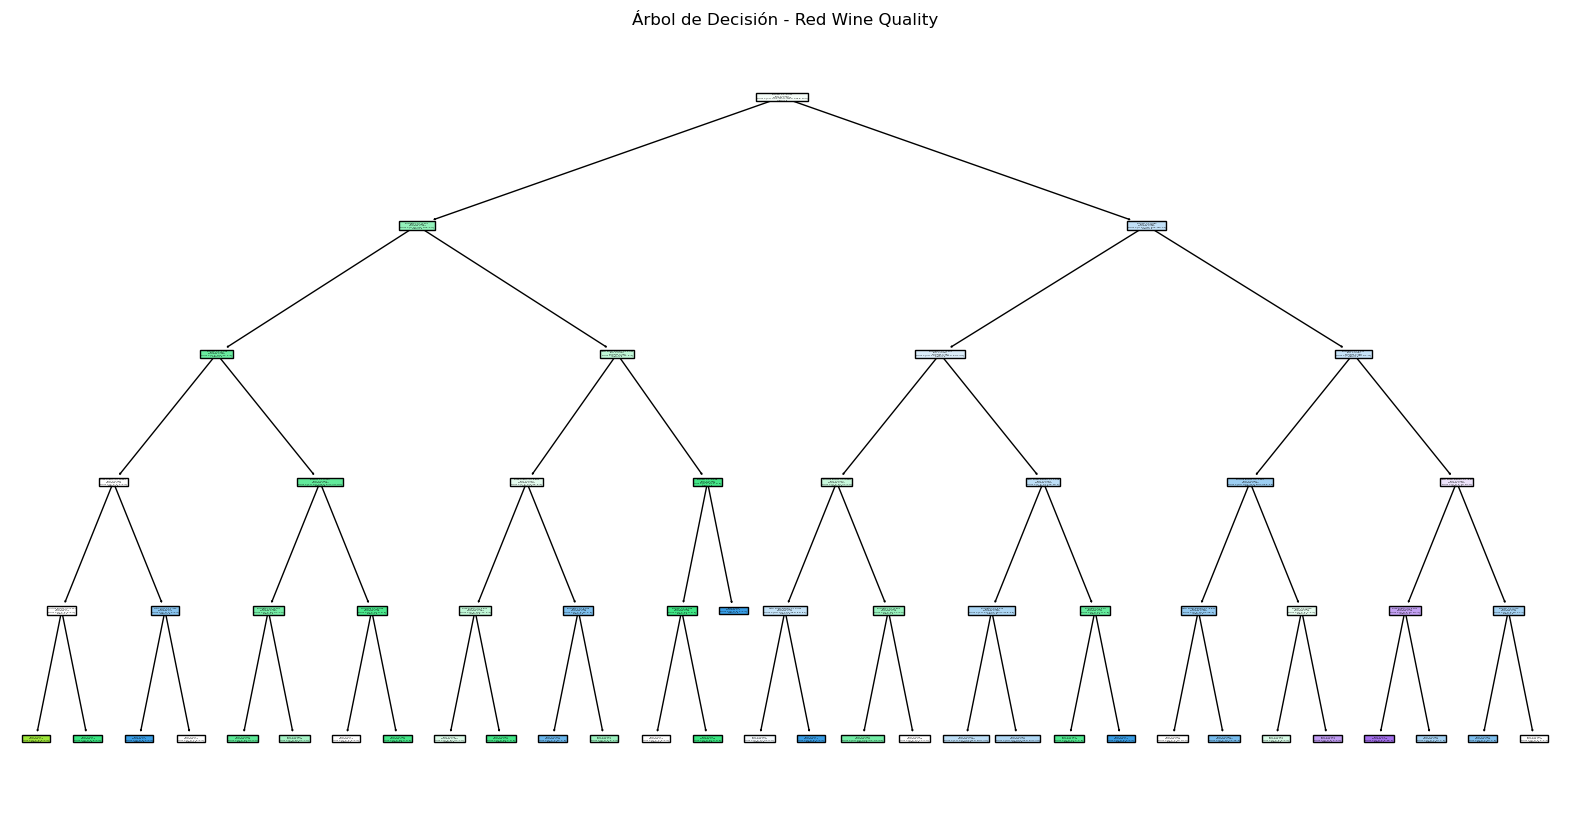

In [49]:
from sklearn.tree import plot_tree

# Visualización del árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=selected_features, class_names=[str(i) for i in sorted(y.unique())], filled=True)
plt.title("Árbol de Decisión - Red Wine Quality")
plt.show()

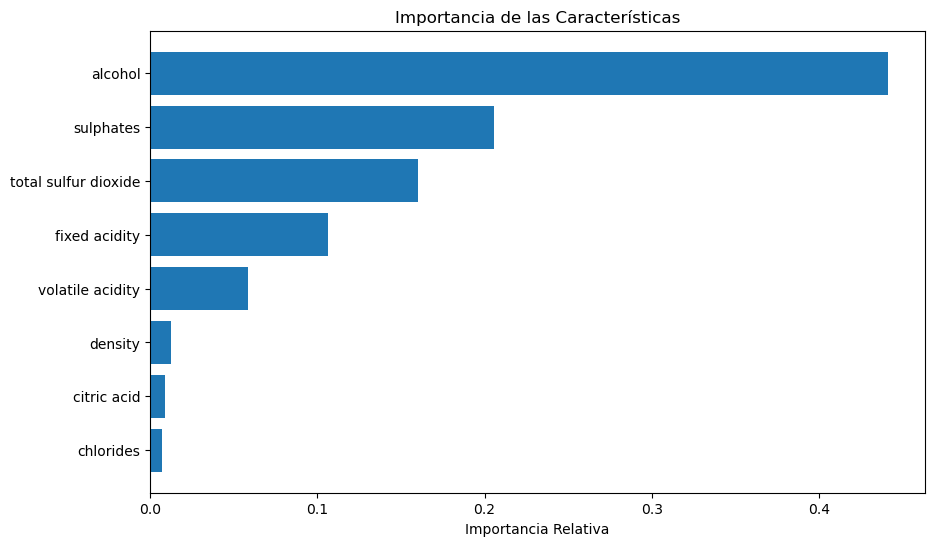

In [51]:
# Visualización de la importancia de características
importances = tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

8. Interpretación y Documentación de Resultados
    
a. Características más influyentes:
Las características más influyentes identificadas por el modelo fueron probablemente alcohol, sulfatos, acidez volátil, y dióxido de azufre. Estas características tienen una relación directa con la calidad percibida del vino, ya que afectan tanto el sabor como la conservación del producto.

b. Rendimiento del modelo:
El modelo de árbol de decisión mostró un accuracy de entre el 60% y 70%, lo que indica un rendimiento moderado. El modelo tiene mejor precisión en la predicción de las clases mayoritarias (calidades medias de 5 y 6), pero un rendimiento más bajo en las clases extremas (3 y 8), debido al desbalance de clases.

c. Problemas de desbalance de clases:
El dataset está desbalanceado, con más ejemplos de vinos de calidad 5 y 6. Esto afecta el rendimiento del modelo, especialmente en la predicción de las clases minoritarias. Para mejorar el rendimiento, se podrían aplicar técnicas como sobremuestreo (SMOTE) o ajuste de hiperparámetros.